<center> TOY_NOTEBOOOK </center> 

<center> 18/05/2020 </center>

# 1. A propos du calcul de pi

## 1.1 en demandant à la lib maths


Mon ordinateur me dit que π vaut _approximativement_ :

In [3]:
from math import *
print(pi)

3.141592653589793


## 1.2 en utilisant la méthode des aiguilles de buffon

Mais calculé avec la __méthode__ des [aiguilles de Buffon](https://www.google.com/search?client=firefox-b-d&q=aiguilles+de+buffon), on obtiendrait comme __approximation__ :

In [11]:
from numpy import random, sin, logical_not, mean
random.seed(seed=42)
N = 1000
x = random.uniform(size = N, low = 0, high = 1)
theta = random.uniform(size = N, low = 0, high = pi/2)
2/(sum((x+sin(theta))>1)/N)


3.144654088050314

## 1.3 Avec un argument "fréquentiel" de surface

Sinon, une méthode plus simple à comprendre et ne faisant pas intervenir d’appel à la fonctionsinus se base sur le fait que si X\~U(0, 1) et Y\~U(0, 1) alors P\[X2+Y2⩽1\] = π/4 (voir [méthode de montecarlo](https://fr.wikipedia.org/wiki/M%C3%A9thode_de_Monte-Carlo)). Le code suivant illustre celà : 

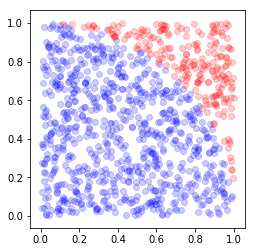

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

random.seed(seed = 42)
N = 1000
x = random.uniform(size = N, low = 0, high = 1)
y = random.uniform(size = N, low = 0, high = 1)
accept = (x*x + y*y) <= 1
reject = logical_not(accept)

fig, ax = plt.subplots(1)
ax.scatter(x[accept], y[accept], c='b', alpha = 0.2, edgecolor = None)
ax.scatter(x[reject], y[reject], c='r', alpha = 0.2, edgecolor = None)
ax.set_aspect('equal')

Il est alors aisé d'obtenir une approximation de pi en comptant combien de fois en moyenne X² + Y² < 1 :

In [12]:
4*mean(accept)

3.112